In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import keras

In [4]:
#import the MNIST dataset at first
mnist = tf.keras.datasets.mnist
# we have training set and test set
(xt, yt),(xtest,ytest) = mnist.load_data()

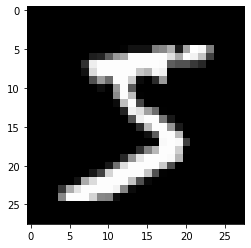

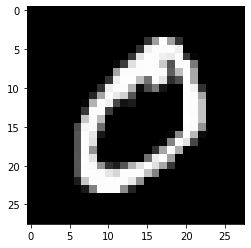

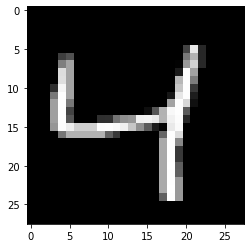

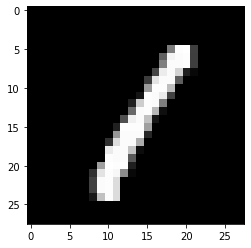

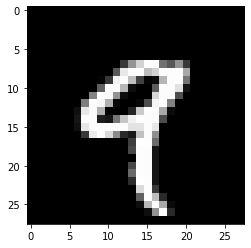

In [5]:
#get image and process image, get a good look at the first 5 images in a black and white gradient
for i in range(0,5):
    plt.imshow(xt[i], cmap='gray')
    plt.show()


In [6]:
print(yt[0])

5


In [7]:
#convert everything from 0 to 1
xt = tf.keras.utils.normalize(xt, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

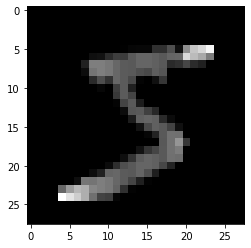

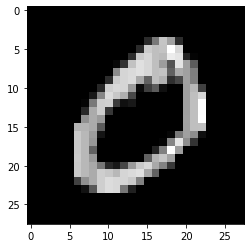

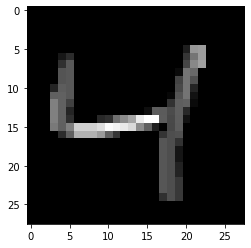

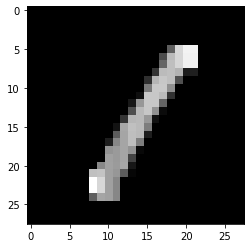

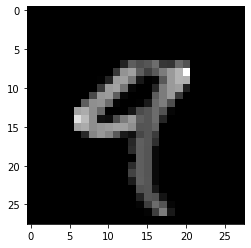

In [8]:
for i in range(0,5):
    plt.imshow(xt[i], cmap="gray")
    plt.show()

In [9]:
print(xt[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
# do SVD in the data set
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier


In [11]:
xtt=[]
for x in xt:
    u, s, t = np.linalg.svd(x)
    ss = np.zeros((x.shape[0], x.shape[1]))
    ss[:x.shape[0], :x.shape[0]] = np.diag(s)
    
    # dimension
    nd = 2
    ss = ss[:, :nd]
    vt = t[:nd, :]

    # construction of the a matrix
    test = u.dot(ss.dot(vt))
    xtt.append(test)


In [12]:
print(len(xtt[1]))
print(len(xt[1]))

28
28


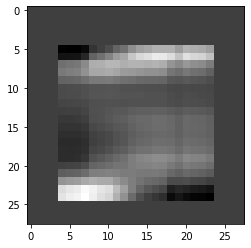

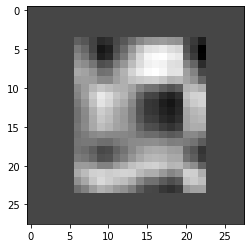

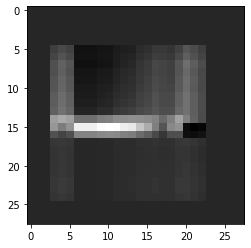

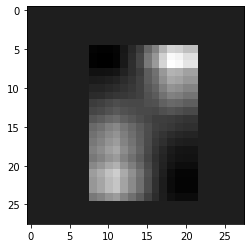

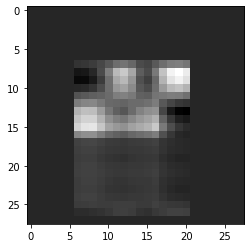

In [13]:
#testing the svd 
for i in range(0,5):
    plt.imshow(xtt[i], cmap='gray')
    plt.show()

In [15]:
# construct a keras model object
nn = tf.keras.models.Sequential()

# Flatten the matrices
flat = tf.keras.layers.Flatten()
nn.add(flat)

# Use input and all other hidden layers
hidden = tf.keras.layers.Dense(200, activation=tf.nn.relu)
nn.add(hidden)
nn.add(hidden)

# output layer of nn
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
nn.add(output)

#compile the neural network
nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
#timer
import time

class batch_timer(keras.callbacks.Callback):
    def __init__(self  ):
        super(batch_timer, self).__init__()
        
    def on_train_begin(self, batch, logs=None):
        self.start_time=time.time()    
    def on_train_end(self, batch, logs=None):
        stop_time=time.time()
        duration =stop_time-self.start_time
        print(duration) 

In [28]:
#train the neural network using 5 epochs
yt = tf.stack(yt)
xtt = tf.stack(xtt)

nn.fit(x=xtt, y=yt, epochs=5, callbacks=[batch_timer()])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9846
19.002496004104614


In [29]:
# Test our model's performance
testLoss, testAccuracy = nn.evaluate(x=xtest, y=ytest)
# Accuracy
print('\nTest accuracy:', testAccuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9511

Test accuracy: 0.9510999917984009


313/313 [==============================] - 0s 1ms/step


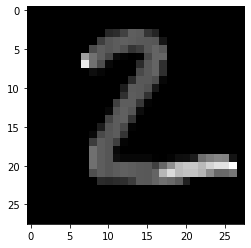

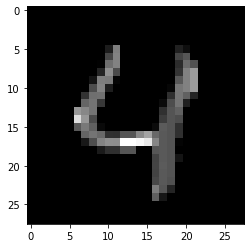

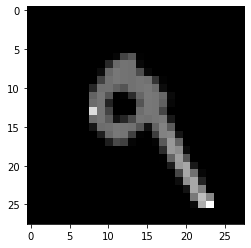

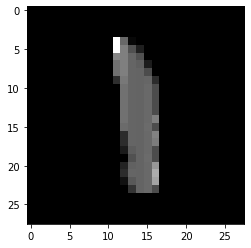

In [30]:
predict = nn.predict([xtest]) # Make prediction
#lets predict the 1, 4, 7, and 777's image
plt.imshow(xtest[1], cmap="gray")
plt.show()
plt.imshow(xtest[4], cmap="gray")
plt.show()
plt.imshow(xtest[7], cmap="gray")
plt.show()
plt.imshow(xtest[777], cmap="gray")
plt.show()

In [31]:
print(np.argmax(predict[1]))
print(np.argmax(predict[4]))
print(np.argmax(predict[7]))
print(np.argmax(predict[777]))

2
4
1
1


In [32]:
# we can see that our model has succesfully predicted these numbers 

In [33]:
# now lets contrast this to the result we have without using SVD
# construct a keras model object
newnn = tf.keras.models.Sequential()

# Flatten the matrices
flat = tf.keras.layers.Flatten()
newnn.add(flat)

# Use input and all other hidden layers
hidden = tf.keras.layers.Dense(168, activation=tf.nn.relu)
newnn.add(hidden)
newnn.add(hidden)

# output layer of nn
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
newnn.add(output)

#compile the neural network
newnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
yt = tf.stack(yt)
xt = tf.stack(xtt)

newnn.fit(x=xt, y=yt, epochs=5, callbacks=[batch_timer()])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4051 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2241 - accuracy: 0.9297
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1787 - accuracy: 0.9430
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1533 - accuracy: 0.9508
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9567
20.377702951431274


In [35]:
testLoss, testAccuracy = newnn.evaluate(x=xtest, y=ytest)
# Accuracy
print('\nTest accuracy:', testAccuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9493

Test accuracy: 0.9492999911308289


In [36]:
#as you can see, the test accuracy of the new NN model without the SVD is lower than with SVD

313/313 [==============================] - 0s 1ms/step


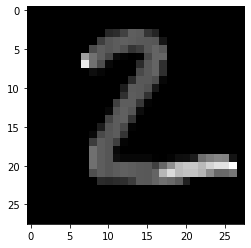

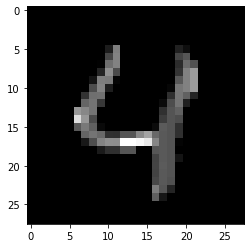

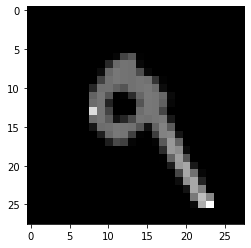

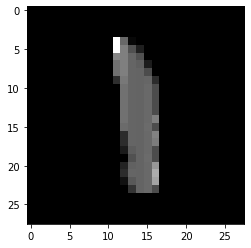

In [37]:
predict = nn.predict([xtest]) # Make prediction
#lets predict the 1, 4, 7, and 777's image
plt.imshow(xtest[1], cmap="gray")
plt.show()
plt.imshow(xtest[4], cmap="gray")
plt.show()
plt.imshow(xtest[7], cmap="gray")
plt.show()
plt.imshow(xtest[777], cmap="gray")
plt.show()

In [38]:
print(np.argmax(predict[1]))
print(np.argmax(predict[4]))
print(np.argmax(predict[7]))
print(np.argmax(predict[777]))

2
4
1
1


In [118]:
# still managed to predict these characters though :)